<a href="https://colab.research.google.com/github/GaneshPatilDS/Runs_Progression_Chart/blob/main/Runs_Progression_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


In [ ]:
df=pd.read_csv('all_matches.csv')

In [ ]:
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Total_Runs'] = df.apply(lambda x : x['runs_off_bat'] + x['extras'], axis = 1)

In [ ]:
df['Total_Runs'].head()

0    1
1    0
2    1
3    0
4    0
Name: Total_Runs, dtype: int64

In [ ]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
df_Mi = df[df['batting_team'] == 'Mumbai Indians']


In [ ]:
df_Mi

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Total_Runs
932,335985,2007/08,2008-04-20,Wankhede Stadium,1,0.1,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,ST Jayasuriya,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
933,335985,2007/08,2008-04-20,Wankhede Stadium,1,0.2,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,ST Jayasuriya,P Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
934,335985,2007/08,2008-04-20,Wankhede Stadium,1,0.3,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,ST Jayasuriya,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
935,335985,2007/08,2008-04-20,Wankhede Stadium,1,0.4,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,ST Jayasuriya,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
936,335985,2007/08,2008-04-20,Wankhede Stadium,1,0.5,Mumbai Indians,Royal Challengers Bangalore,L Ronchi,ST Jayasuriya,P Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255387,1426286,2024,2024-04-30,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,19.2,Mumbai Indians,Lucknow Super Giants,TH David,G Coetzee,Mohsin Khan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
255388,1426286,2024,2024-04-30,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,19.3,Mumbai Indians,Lucknow Super Giants,TH David,G Coetzee,Mohsin Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
255389,1426286,2024,2024-04-30,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,19.4,Mumbai Indians,Lucknow Super Giants,TH David,G Coetzee,Mohsin Khan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
255390,1426286,2024,2024-04-30,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,19.5,Mumbai Indians,Lucknow Super Giants,TH David,G Coetzee,Mohsin Khan,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
df_Mi['match_id'].unique()

array([ 335985,  335989,  335991,  335994,  335997,  336004,  336008,
        336018,  336021,  336024,  336028,  336032,  336036,  336012,
        392181,  392192,  392197,  392200,  392203,  392208,  392212,
        392215,  392218,  392222,  392225,  392227,  392235,  419107,
        419114,  419119,  419122,  419125,  419130,  419132,  419138,
        419142,  419146,  419150,  419152,  419157,  419161,  419162,
        419165,  501201,  501205,  501210,  501218,  501221,  501224,
        501231,  501237,  501241,  501246,  501251,  501256,  501263,
        501267,  501269,  501270,  548306,  548308,  548314,  548317,
        548325,  548334,  548339,  548342,  548346,  548351,  548355,
        548360,  548363,  548367,  548370,  548377,  548379,  597999,
        598002,  598006,  598011,  598019,  598024,  598029,  598033,
        598037,  598039,  598046,  598050,  598055,  598060,  598063,
        598066,  598070,  598072,  598073,  729279,  729287,  729303,
        729309,  729

In [ ]:
import plotly.graph_objects as go

def show_summary(df, matchID):
    df = df[df.match_id == matchID]

    df1 = df[df.innings == 1]
    df2 = df[df.innings == 2]

    df1.reset_index(inplace=True, drop=True)
    df2.reset_index(inplace=True, drop=True)

    df1['cum_runs'] = df1['Total_Runs'].cumsum()
    df2['cum_runs'] = df2['Total_Runs'].cumsum()

    fig = go.Figure()

    # Adding traces for each team's runs with colorful team names
    fig.add_trace(go.Scatter(x=df1.index + 1, y=df1.cum_runs, mode='lines', name=f'<span style="color:blue">{df1["batting_team"].iloc[0]}</span>', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df2.index + 1, y=df2.cum_runs, mode='lines', name=f'<span style="color:green">{df2["batting_team"].iloc[0]}</span>', line=dict(color='green')))

    # Adding markers for wickets with different colors
    wk_index1 = df1[~df1.player_dismissed.isna()].index + 1
    wk_index2 = df2[~df2.player_dismissed.isna()].index + 1
    fig.add_trace(go.Scatter(x=wk_index1, y=df1.cum_runs.iloc[wk_index1 - 1], mode='markers', name='Wickets ' + df1['batting_team'].iloc[0], marker=dict(color='red', size=10)))
    fig.add_trace(go.Scatter(x=wk_index2, y=df2.cum_runs.iloc[wk_index2 - 1], mode='markers', name='Wickets ' + df2['batting_team'].iloc[0], marker=dict(color='orange', size=10)))

    # Adding vertical dashed lines at x = 36 and x = 90
    fig.add_shape(dict(type='line', x0=36, y0=0, x1=36, y1=max(df1.cum_runs.max(), df2.cum_runs.max()), line=dict(dash='dash', color='gray')))
    fig.add_shape(dict(type='line', x0=90, y0=0, x1=90, y1=max(df1.cum_runs.max(), df2.cum_runs.max()), line=dict(dash='dash', color='gray')))

    # Updating layout with title, axis labels, and annotations
    fig.update_layout(
        title=dict(text="<b>Match Summary - Runs Progression Chart</b>", font=dict(color='orange')),  # Changing the title color to orange and making it bold
        xaxis_title=dict(text= "<b>Ball Number</b>", font=dict(color='orange', size=16)),
        yaxis_title=dict(text="<b>Runs</b>", font=dict(color='orange', size=16)),
        legend_title=dict(text="<b>Team</b>", font=dict(color='orange', size=16)),  # Updating legend title color and size
        plot_bgcolor='rgba(0,0,0,0)',  # Making plot background transparent
        paper_bgcolor='rgba(0,0,0,0)',  # Making paper background transparent
        font=dict(family="Arial, sans-serif", size=12, color="black"),  # Setting font style and size
        margin=dict(l=50, r=50, t=50, b=50),  # Adjusting margins
        hovermode="x",  # Displaying hover information for nearest data point along the x-axis
        xaxis=dict(showgrid=False, color='black', tickangle=45, tickfont=dict(color='red', size=12)),  # Updating x-axis properties
        yaxis=dict(showgrid=False, color='black', tickformat=".2f", tickfont=dict(color='red', size=12)),  # Updating y-axis properties
        annotations=[
            dict(x=16, y=0, xref='x', yref='y', text="<b><span style='color:red'>Powerplay</span></b>", showarrow=False),
            dict(x=60, y=0, xref='x', yref='y', text="<b><span style='color:blue'>Middle Overs</span></b>", showarrow=False),
            dict(x=90, y=0, xref='x', yref='y', text="<b><span style='color:green'>Death Overs</span></b>", showarrow=False)
        ]
    )

    fig.show()


In [ ]:
show_summary(df,1426286)

-------------------------------------------------------------------------------
# After running 'show_summary(df, 1426286)', we obtained the following plot

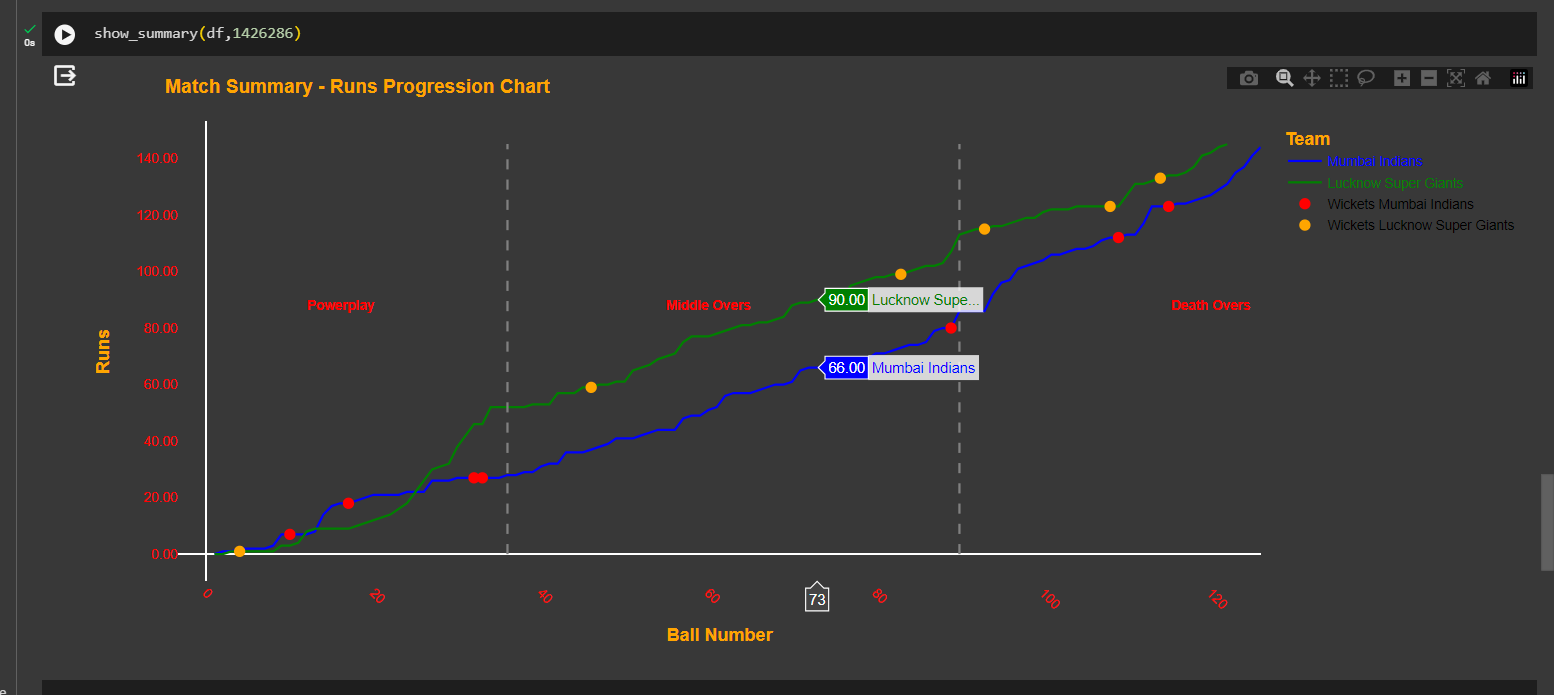

--------------------------------------------------------------------------------

